In [5]:
from sklearn.metrics import mean_squared_error;

In [6]:
print("hello world");

hello world


In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("Indian_Kids_Screen_Time.csv");

In [8]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [10]:
print("null values:\n",data.isnull().sum())

null values:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


<Axes: xlabel='Age', ylabel='Avg_Daily_Screen_Time_hr'>

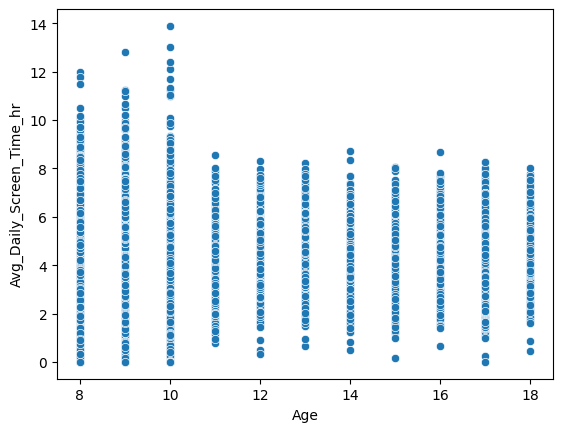

In [11]:
sns.scatterplot(y='Avg_Daily_Screen_Time_hr',x='Age', data=data)

In [12]:
x=data['Age'].values.reshape(-1,1)
y=data['Avg_Daily_Screen_Time_hr']

model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)  # Predict on test set

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.2993021976209327


In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 2.93


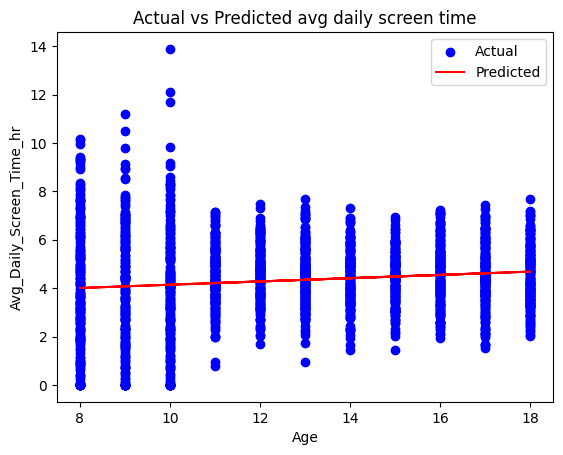

In [22]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title("Actual vs Predicted avg daily screen time")
plt.xlabel("Age")
plt.ylabel("Avg_Daily_Screen_Time_hr")
plt.legend()
plt.show()


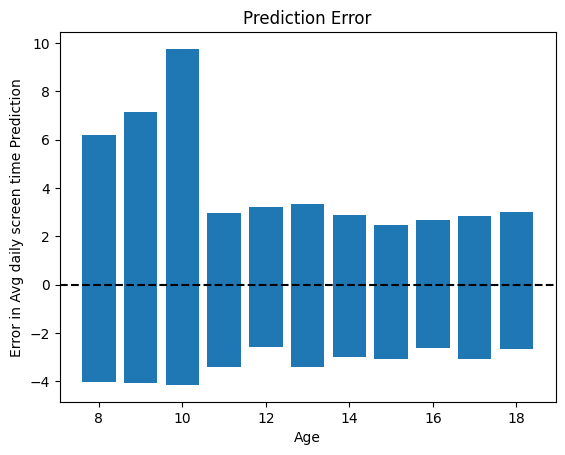

In [26]:
errors = y_test - y_pred
plt.bar(x_test.flatten(), errors)
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Error")
plt.xlabel("Age")
plt.ylabel("Error in Avg daily screen time Prediction")
plt.show()
